In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from imblearn.over_sampling import SMOTE

# READING CSV TO DATAFRAME

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df=df.head(200000)

# UNDERSTANDING DATA

In [4]:
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
199995,199995,male,33,184.0,83.0,3.0,82.0,38.8,7.0
199996,199996,female,40,174.0,67.0,13.0,89.0,40.0,56.0
199997,199997,female,36,169.0,67.0,16.0,96.0,40.4,82.0
199998,199998,female,34,170.0,70.0,2.0,73.0,37.8,3.0


In [5]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [6]:
df.tail()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
199995,199995,male,33,184.0,83.0,3.0,82.0,38.8,7.0
199996,199996,female,40,174.0,67.0,13.0,89.0,40.0,56.0
199997,199997,female,36,169.0,67.0,16.0,96.0,40.4,82.0
199998,199998,female,34,170.0,70.0,2.0,73.0,37.8,3.0
199999,199999,female,76,158.0,61.0,17.0,99.0,40.3,104.0


In [7]:
df.shape

(200000, 9)

In [8]:
df.dtypes

id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          200000 non-null  int64  
 1   Sex         200000 non-null  object 
 2   Age         200000 non-null  int64  
 3   Height      200000 non-null  float64
 4   Weight      200000 non-null  float64
 5   Duration    200000 non-null  float64
 6   Heart_Rate  200000 non-null  float64
 7   Body_Temp   200000 non-null  float64
 8   Calories    200000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 13.7+ MB


In [10]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,41.384860,174.693756,75.129875,15.410410,95.473250,40.035404,88.239070
std,57735.171256,15.155966,12.845653,13.987993,8.360512,9.457829,0.780656,62.470169
min,0.000000,20.000000,136.000000,37.000000,1.000000,67.000000,37.100000,1.000000
25%,49999.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,99999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,76.000000
75%,149999.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,199999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# DATA CLEANING

In [11]:
df.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['id'],inplace=True)

In [14]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


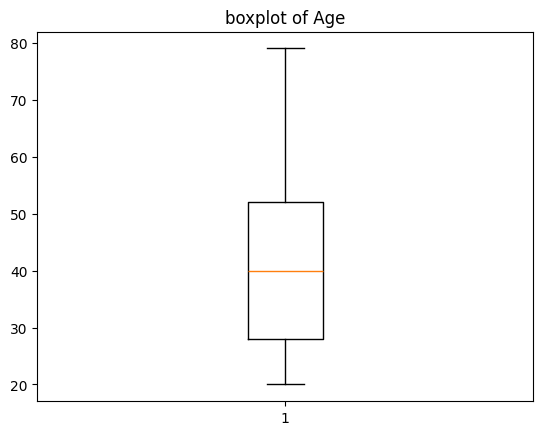

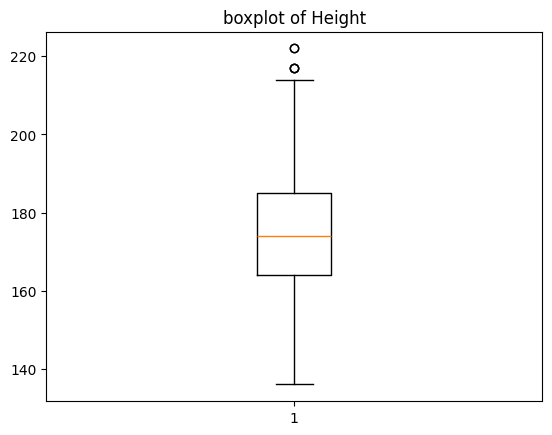

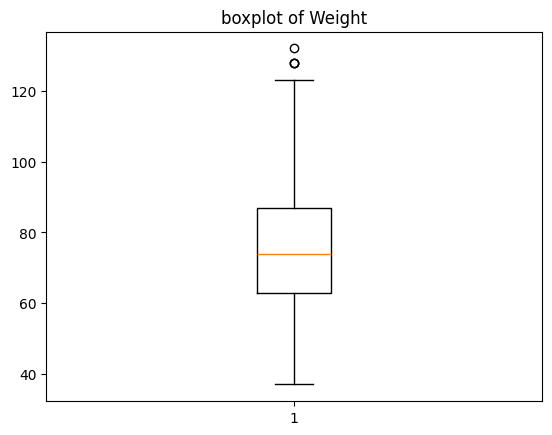

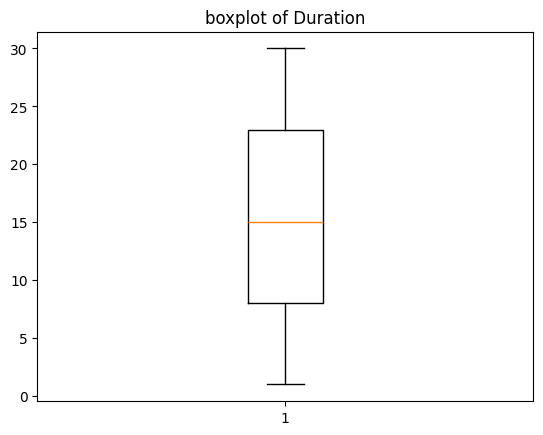

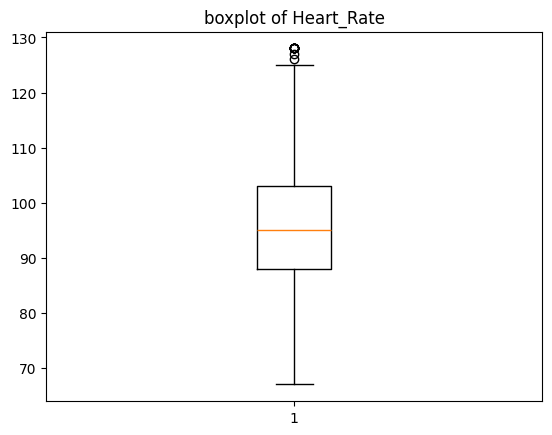

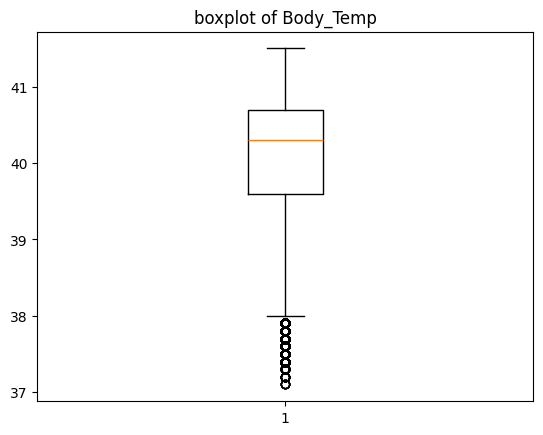

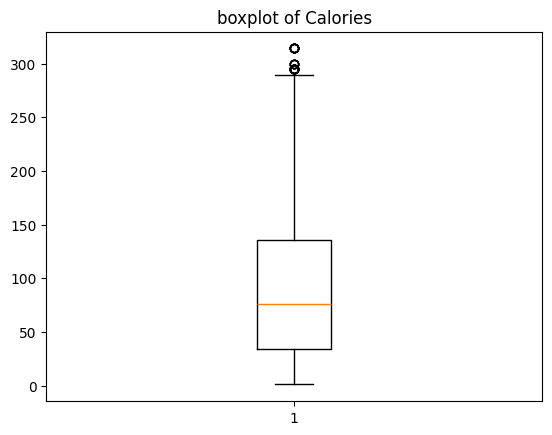

In [15]:
for i in df:
    if df[i].dtypes in ['float64','int64']:
        plt.boxplot(df[i])
        plt.title(f"boxplot of {i}")
        plt.show()

In [16]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


# ENCODING

In [17]:
def duration_cat(x):
    if x<=10:
        return "short"
    elif x<=20:
        return "medium"
    else:
        return "long"

In [18]:
df['duration_cat']=df['Duration'].apply(duration_cat)

In [19]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df,columns=['duration_cat'],dtype=int)

In [20]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [21]:
df.drop(columns=['Duration'],inplace=True)

In [22]:
df.head()

,Sex,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,duration_cat_long,duration_cat_medium,duration_cat_short
0,1,36,189.0,82.0,101.0,41.0,150.0,1,0,0
1,0,64,163.0,60.0,85.0,39.7,34.0,0,0,1
2,0,51,161.0,64.0,84.0,39.8,29.0,0,0,1
3,1,20,192.0,90.0,105.0,40.7,140.0,1,0,0
4,0,38,166.0,61.0,102.0,40.6,146.0,1,0,0


In [23]:
x=df.drop(columns=['Calories'])
y=df['Calories']

# SCALING

In [24]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

# SPLITTING

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y)

# MODEL TRAINING

In [26]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"model of {model}")
    print(r2_score(y_test,y_pred))
    print(mean_absolute_error(y_test,y_pred))
    print(root_mean_squared_error(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))

model of KNeighborsRegressor()
0.9663104679152471
8.116656
11.446781975734492
131.02881760000002
model of SVR()
0.9704079876432041
7.725925993060036
10.728108848751653
115.0923194706635
model of DecisionTreeRegressor()
0.9422937851440648
10.40272
14.98122117111211
224.43698777777772
model of RandomForestRegressor()
0.968533544161454
7.790704793578644
11.062666912034937
122.3825992066326
model of GradientBoostingRegressor()
0.9697487774323729
7.845997109867817
10.846943721655895
117.65618810077025


In [27]:
final_model=RandomForestRegressor()
final_model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
y_pred_final=final_model.predict(x_test)

In [29]:
print(cross_val_score(final_model,x_train,y_train,cv=5).mean())

0.9684833033429001


# TUNING

In [30]:
RandomForestRegressor()

RandomForestRegressor()

In [31]:
para_grid={
    'n_estimators':[100,150,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,4,6]
}

In [32]:
grid_search=GridSearchCV(estimator=final_model,param_grid=para_grid,cv=5)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

In [34]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200)

In [35]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)
y_pred_best=best_model.predict(x_test)
print(r2_score(y_test,y_pred))

0.9697487774323729


# Save the trained model using joblib as the dataset is very large

In [36]:
import joblib

# Save your trained pipeline model
joblib.dump(best_model,'final_model.joblib')
print('saved sucessfully')

saved sucessfully


In [37]:
# Load model
model = joblib.load('final_model.joblib')